<a href="https://colab.research.google.com/github/evacs/Project-4-MovieRec/blob/eva/Movie_cleaning_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook imports and cleans our data

# Data importation and cleaning


In [1]:
# !pip install ipython-sql
# !pip install db-sqlite3
# !pip install flask sqlalchemy
# !pip install Flask-SQLAlchemy

In [2]:
import sqlite3
import pandas as pd
import os
import numpy as np

#addition for file paths
from google.colab import drive

In [3]:
%load_ext sql
%sql sqlite://

In [4]:
# Create database in sqlite
conn = sqlite3.connect('movieRatings.db')

In [5]:
%%sql
CREATE TABLE movies (
    movieId INT PRIMARY KEY,
    title VARCHAR(255),
    genre VARCHAR(255)
);

 * sqlite://
Done.


[]

In [6]:
# List files in the current directory
files = os.listdir('.')
files

['.config', 'movieRatings.db', 'sample_data']

In [7]:
#all new code

csv_file_path = 'ml-latest-small/movies.csv'
table_name = 'movies'

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Copy files from Google Drive
!cp -r /content/gdrive/MyDrive/ml-latest-small/ .

# Read the CSV file using pandas
movies_df = pd.read_csv(csv_file_path)

# Write the data to the SQLite database
movies_df.to_sql(table_name, conn, if_exists='replace', index=False)


Mounted at /content/gdrive


9742

In [8]:
# Verify import
query = f"SELECT * FROM {table_name};"
result = pd.read_sql(query, conn)
print(result)


      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [9]:
%%sql
CREATE TABLE links (
    movieId INT,
    imdbId INT,
    tmdbId INT,
    FOREIGN KEY (movieId) REFERENCES movies(movieId)
);


 * sqlite://
Done.


[]

In [10]:
%%sql
CREATE TABLE ratings (
    userId INT,
    movieId INT,
    rating INT,
    timestamp INT,
    FOREIGN KEY (movieId) REFERENCES movies(movieId)
);


 * sqlite://
Done.


[]

In [11]:
%%sql
CREATE TABLE tags (
    userId INT,
    movieId INT,
    tag VARCHAR(255),
    timestamp INT,
    FOREIGN KEY (movieId) REFERENCES movies(movieId)
);


 * sqlite://
Done.


[]

In [12]:
csv_file_path = 'ml-latest-small/ratings.csv'
table_name = 'ratings'

# Read the CSV file using pandas
ratings_df = pd.read_csv(csv_file_path)

# Write the data to the SQLite database
ratings_df.to_sql(table_name, conn, if_exists='replace', index=False)


100836

In [13]:
csv_file_path = 'ml-latest-small/links.csv'
table_name = 'links'

# Read the CSV file using pandas
links_df = pd.read_csv(csv_file_path)

# Write the data to the SQLite database
links_df.to_sql(table_name, conn, if_exists='replace', index=False)


9742

In [14]:
csv_file_path = 'ml-latest-small/tags.csv'
table_name = 'tags'

# Read the CSV file using pandas
tags_df = pd.read_csv(csv_file_path)

# Write the data to the SQLite database
tags_df.to_sql(table_name, conn, if_exists='replace', index=False)


3683

In [15]:
# View a table to varify
table_name = "links"
query = f"SELECT * FROM {table_name};"
result = pd.read_sql(query, conn)
print(result)


      movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
...       ...      ...       ...
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0

[9742 rows x 3 columns]


In [16]:
# GIVES AN ERROR-IGNORE IT
# Split the genre column into separate columns
genres_split = movies_df['genres'].str.get_dummies('|')

# Concatenate the split genres DataFrame with the original movies DataFrame
movies_df = pd.concat([movies_df, genres_split], axis=1)

# Drop the original genre column
movies_df = movies_df.drop('genres', axis=1)

# Fill NaN values with 0 in the new genre columns
# movies_df = movies_df.fillna(0).astype(int)


In [17]:
# View error
movies_df.loc[movies_df['title'] == 'Toy Story (1995)']

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# genres = ["Action", "Adventure","Animation","Children's","Comedy", "Crime", "Documentary", "Drama","Fantasy","Film-Noir", "Horror",
# "Musical","Mystery","Romance","Sci-Fi","Thriller", "War","Western","(no genres listed)"]

In [19]:



# Filter the DataFrame to get movies with 'No genres listed' (1 in the column)
no_genres_movies = movies_df[movies_df['(no genres listed)'] == 1]

# Extract the titles of these movies
titles_with_no_genres = no_genres_movies['title']

# Display the list of titles
movies_df = movies_df[movies_df['(no genres listed)'] != 1]


In [20]:


# Drop IMAX column
movies_df = movies_df.drop('IMAX', axis=1)

# Write to db
movies_df.to_sql('movies', conn, if_exists='replace', index=False)

9708

In [21]:
%%sql
SELECT * FROM links
LIMIT 10;

 * sqlite://
Done.


movieId,imdbId,tmdbId


In [22]:
movies_df = movies_df.drop('(no genres listed)', axis=1)
movies_df.to_sql('movies', conn, if_exists='replace', index=False)

9708

In [23]:


# SQL query to select the first few rows
query = "SELECT * FROM movies LIMIT 5"

# Use Pandas to execute the SQL query and display the result
result = pd.read_sql(query, conn)
result

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# SQL query to join the "movies" and "ratings" tables based on the "movieId" column
query = """
SELECT m.*, r.userId, r.rating, r.timestamp
FROM movies AS m
INNER JOIN ratings AS r ON m.movieId = r.movieId
"""

# Use Pandas to execute the SQL query and display the result
result = pd.read_sql(query, conn)
result.head(10)


,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,17,4.5,1305696483
5,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,18,3.5,1455209816
6,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,19,4.0,965705637
7,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,21,3.5,1407618878
8,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,27,3.0,962685262
9,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,31,5.0,850466616


In [25]:
# Drop timestamps from all tables
movie_data = result.drop('timestamp', axis=1)
movie_data.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,4.0
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,5,4.0
2,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,7,4.5
3,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,15,2.5
4,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,17,4.5


In [26]:
# drop tmdb
links_df = links_df.drop('tmdbId', axis=1)

# Write to db
links_df.to_sql('links', conn, if_exists='replace', index=False)

# View table
links_df.head()

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


In [27]:
# find top 5 movies in each genre

genre_columns = ["Action", "Adventure","Animation","Children","Comedy", "Crime", "Documentary", "Drama","Fantasy","Film-Noir", "Horror",
"Musical","Mystery","Romance","Sci-Fi","Thriller", "War","Western"]

# Create a new DataFrame to store the top 5 movies for each genre
top_movies_df = pd.DataFrame(columns = genre_columns)

# Iterate through each genre
for genre in genre_columns:
    # Select movies of the current genre
    genre_movies = result[result[genre] == 1]

    # Group by movie title and count the number of ratings
    genre_movie_counts = genre_movies.groupby('title').size().reset_index(name='rating_count')

    # Sort by rating count in descending order and select the top 5
    top_genre_movies = genre_movie_counts.sort_values(by='rating_count', ascending=False).head(5)

    # Store data
    top_movies = top_genre_movies['title'].reset_index(drop=True)

    # Populate df with top 5 movies in each category
    # top_movies_list.append(top_movies)
    top_movies_df[genre]=top_movies

top_movies_df


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Toy Story (1995),Toy Story (1995),Forrest Gump (1994),"Shawshank Redemption, The (1994)",Bowling for Columbine (2002),Forrest Gump (1994),Toy Story (1995),L.A. Confidential (1997),"Silence of the Lambs, The (1991)",Aladdin (1992),"Usual Suspects, The (1995)",Forrest Gump (1994),"Matrix, The (1999)",Pulp Fiction (1994),Forrest Gump (1994),Dances with Wolves (1990)
1,Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Aladdin (1992),Aladdin (1992),Pulp Fiction (1994),Pulp Fiction (1994),Super Size Me (2004),"Shawshank Redemption, The (1994)","Lord of the Rings: The Fellowship of the Ring,...",Sin City (2005),"Sixth Sense, The (1999)","Lion King, The (1994)",Seven (a.k.a. Se7en) (1995),American Beauty (1999),Star Wars: Episode IV - A New Hope (1977),"Silence of the Lambs, The (1991)",Braveheart (1995),Back to the Future Part III (1990)
2,Jurassic Park (1993),Toy Story (1995),"Lion King, The (1994)","Lion King, The (1994)",Toy Story (1995),"Silence of the Lambs, The (1991)",Fahrenheit 9/11 (2004),Pulp Fiction (1994),"Lord of the Rings: The Two Towers, The (2002)",Chinatown (1974),Alien (1979),Beauty and the Beast (1991),"Sixth Sense, The (1999)",True Lies (1994),Jurassic Park (1993),"Matrix, The (1999)",Schindler's List (1993),Maverick (1994)
3,Braveheart (1995),Star Wars: Episode V - The Empire Strikes Back...,Shrek (2001),Shrek (2001),Aladdin (1992),Fight Club (1999),Roger & Me (1989),Braveheart (1995),"Lord of the Rings: The Return of the King, The...",Mulholland Drive (2001),Aliens (1986),Willy Wonka & the Chocolate Factory (1971),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Speed (1994),Terminator 2: Judgment Day (1991),Jurassic Park (1993),Saving Private Ryan (1998),"Good, the Bad and the Ugly, The (Buono, il bru..."
4,Terminator 2: Judgment Day (1991),Independence Day (a.k.a. ID4) (1996),Beauty and the Beast (1991),Beauty and the Beast (1991),Fargo (1996),"Usual Suspects, The (1995)",Hoop Dreams (1994),Schindler's List (1993),Shrek (2001),Dark City (1998),Interview with the Vampire: The Vampire Chroni...,"Nightmare Before Christmas, The (1993)",Mission: Impossible (1996),Shrek (2001),Star Wars: Episode V - The Empire Strikes Back...,Fight Club (1999),Apocalypse Now (1979),Django Unchained (2012)


In [28]:

top_movies_df.to_sql('top_movies', conn, if_exists='replace', index=False)


5

In [29]:
query = "SELECT * FROM links"
links = pd.read_sql(query,conn)

query = "SELECT * FROM tags"
tags = pd.read_sql(query,conn)

query = "SELECT * FROM top_movies"
top_movies = pd.read_sql(query,conn)


In [30]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
result = pd.read_sql(query,conn)
result

,name
0,ratings
1,tags
2,movies
3,links
4,top_movies


In [31]:
query = "SELECT * FROM tags"
tags = pd.read_sql(query,conn)
tags


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [32]:
# query = "SELECT * FROM movie_data"
# movie_data = pd.read_sql(query,conn)
# movies_data.head()

# Model training

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback

In [35]:
# Split our preprocessed data into our features and target arrays
y = movie_data['rating'].values
X = movie_data[['userId', 'movieId']].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [36]:
# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Custom callback to print information every n epochs
class PrintEveryNEpochs(Callback):
    def __init__(self, n=5):
        self.n = n

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.n == 0:
            print(f'Epoch {epoch + 1}: {logs}')

In [40]:
# Create model
model = Sequential([
    Dense(108, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Create an instance of the custom callback
print_callback = PrintEveryNEpochs(n=10)

# history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[print_callback])

# # Evaluate the model on the test set
# y_pred = model.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error on Test Set: {mse}')

In [ ]:
# Create an instance of the custom callback
print_callback = PrintEveryNEpochs(n=50)

# Train the model with verbose=2 and use the callback
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=0, callbacks=[print_callback])

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 50: {'loss': 1.0527501106262207, 'val_loss': 1.0599251985549927}
Epoch 100: {'loss': 1.0427839756011963, 'val_loss': 1.0477651357650757}
Epoch 150: {'loss': 1.0336054563522339, 'val_loss': 1.0407042503356934}
Epoch 200: {'loss': 1.0308665037155151, 'val_loss': 1.037549614906311}
Epoch 250: {'loss': 1.0263023376464844, 'val_loss': 1.035375952720642}
Epoch 300: {'loss': 1.0267012119293213, 'val_loss': 1.035567283630371}
Epoch 350: {'loss': 1.0289546251296997, 'val_loss': 1.044932246208191}
Epoch 400: {'loss': 1.0234401226043701, 'val_loss': 1.0364471673965454}
Epoch 450: {'loss': 1.028283715248108, 'val_loss': 1.0395276546478271}


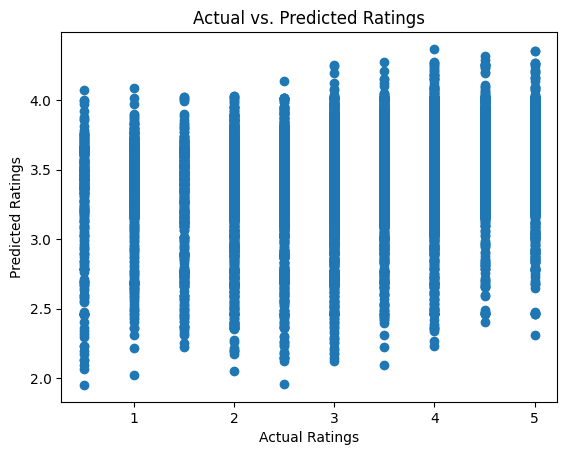

In [56]:
import matplotlib.pyplot as plt

# Assuming y_pred is your model's predictions
# y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")
plt.show()


In [50]:
import pickle

# Assuming 'history' is your training history
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [52]:
# Using standalone Keras
from keras.models import load_model, save_model

# Save the model to an HDF5 file
model.save('movieRec1.keras')

# # Load model
# loaded_model = load_model('movieRec.h5')


# Flask Stuff

In [ ]:
# Copy files from Google Drive
!cp -r /content/gdrive/MyDrive/templates/ .
!cp -r /content/gdrive/MyDrive/static/ .

In [ ]:
!pip install flask pyngrok

In [ ]:
from flask import Flask, render_template
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///test.db'  # SQLite database in memory
db = SQLAlchemy(app)

class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(80), unique=True, nullable=False)

    def __repr__(self):
        return f'<User {self.username}>'

@app.route('/')
def index():
    users = User.query.all()
    return render_template('index.html', users=users)

if __name__ == '__main__':
    app.run()

In [ ]:
from flask import Flask, jsonify, render_template, request
from sqlalchemy import create_engine, text, func, extract
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

app = Flask(__name__)

# Assuming your SQLAlchemy setup is like this
engine = create_engine("sqlite:///movieRatings.db")
Base = automap_base()
Base.prepare(engine, reflect=True)
# Movies = Base.classes.result  # Assuming the table name is 'movies'
# TopMovies = Base.classes.top_movies



@app.route('/')
def index():
    # movie_categories = ["Action", "Adventure","Animation","Children's","Comedy", "Crime", "Documentary", "Drama","Fantasy","Film-Noir", "Horror",
    #                     "Musical","Mystery","Romance","Sci-Fi","Thriller", "War","Western"]

    return render_template('index.html')#, movie_categories=movie_categories)


# Assuming your SQLAlchemy setup is like this
engine = create_engine("sqlite:///movieRatings.db")
print("hello")

query = text("SELECT * FROM links")

if __name__ == '__main__':
    app.run()

In [ ]:
import flask_ngrok
from flask_ngrok import run_with_ngrok


run_with_ngrok(app)  # Start ngrok when the app is run

# This code block will keep the app running during the Colab session
import threading
threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':5000}).start()
